In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [9]:
import splitfolders
input_folder = r"C:\Users\Omkar\Desktop\sem 7projects\Sugar_beets\Nonsegmented"


In [3]:
splitfolders.ratio(input_folder, output="test_1", 
                   seed=42, ratio=(.600, .240, .160),
                  group_prefix=None)

Copying files: 5539 files [00:07, 736.26 files/s]


In [10]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255 ,
                                 shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)



In [11]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Omkar\Desktop\sem 7projects\Sugar_beets\test_1\train" ,
                                                target_size = (64,64) ,
                                                batch_size = 32 ,
                                                class_mode = 'categorical')


Found 3318 images belonging to 12 classes.


In [12]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Omkar\Desktop\sem 7projects\Sugar_beets\test_1\val" ,
                                                target_size = (64,64) ,
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 1324 images belonging to 12 classes.


In [34]:
model = Sequential()
#layer1
#conv layer 1
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (64,64,3)))
#pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

#layer 2
#conv layer 2
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu' , input_shape = (14,14,6)))
#pooling layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#flatten
model.add(Flatten())

#layer 3
#fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))

#layer 4
#fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))

#layer 5
#output layer
model.add(Dense(units = 12, activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(training_set, steps_per_epoch = 100, epochs = 60 ,validation_data = test_set,validation_steps = 30)


Epoch 1/60
100/100 [==============================] - 8s 77ms/step - loss: 2.1786 - accuracy: 0.2480 - val_loss: 1.7983 - val_accuracy: 0.3594
Epoch 2/60
100/100 [==============================] - 10s 100ms/step - loss: 1.6862 - accuracy: 0.3978 - val_loss: 1.5490 - val_accuracy: 0.4344
Epoch 3/60
100/100 [==============================] - 12s 117ms/step - loss: 1.5471 - accuracy: 0.4455 - val_loss: 1.4586 - val_accuracy: 0.4740
Epoch 4/60
100/100 [==============================] - 11s 112ms/step - loss: 1.4303 - accuracy: 0.4887 - val_loss: 1.3754 - val_accuracy: 0.5208
Epoch 5/60
100/100 [==============================] - 11s 105ms/step - loss: 1.2878 - accuracy: 0.5473 - val_loss: 1.2790 - val_accuracy: 0.5427
Epoch 6/60
100/100 [==============================] - 10s 102ms/step - loss: 1.1506 - accuracy: 0.5934 - val_loss: 1.1655 - val_accuracy: 0.5906
Epoch 7/60
100/100 [==============================] - 11s 111ms/step - loss: 1.0500 - accuracy: 0.6276 - val_loss: 1.1245 - val_accu

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2704)              0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [15]:
model.save(r"C:\Users\Omkar\Desktop\sem 7projects\Sugar_beets\lenet\model.h5")
print("Saved")

Saved


In [36]:
from numpy import loadtxt
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf

In [37]:
classifier = load_model(r"C:\Users\Omkar\Desktop\sem 7projects\Sugar_beets\lenet\model.h5)

In [38]:
ids = []
preds = []
from glob import glob
path = r'C:\Users\Omkar\Desktop\sem 7projects\Sugar_beets\test_1\test\*.png'
files = glob(path)
for i in files:
    id = i.split('\\')[-1]
    ids.append(id)
    test_image = tf.keras.utils.load_img(i, target_size = (64,64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    print(id)
    if result[0][0]==1.0:
        prediction = 'Black-grass'
        print(prediction)
    elif result[0][1]==1.0:
        prediction = 'Charlock'
        print(prediction)
    elif result[0][2]==1.0:
        prediction = 'Cleavers'
        print(prediction)
    elif result[0][3]==1.0:
        prediction = 'Common Chickweed'
        print(prediction)
    elif result[0][4]==1.0:
        prediction = 'Common wheat'
        print(prediction)
    elif result[0][5]==1.0:
        prediction = 'Fat Hen'
        print(prediction)
    elif result[0][6]==1.0:
        prediction = 'Loose Silky-bent'
        print(prediction)
    elif result[0][7]==1.0:
        prediction = 'Maize'
        print(prediction)
    elif result[0][8]==1.0:
        prediction = 'Scentless Mayweed'
        print(prediction)
    elif result[0][9]==1.0:
        prediction = 'Shepherds Purse'
        print(prediction)
    elif result[0][10]==1.0:
        prediction = 'Small-flowered Cranesbill'
        print(prediction)
    else:
        prediction = 'Sugar beet'
        print(prediction)
    preds.append(prediction)
        
    
            
    

1/1 [==============================] - 0s 97ms/step
 000.png
Maize
1/1 [==============================] - 0s 24ms/step
 001.png
Common Chickweed
1/1 [==============================] - 0s 24ms/step
 002.png
Maize
1/1 [==============================] - 0s 24ms/step
 003.png
Sugar beet
1/1 [==============================] - 0s 23ms/step
 004.png
Charlock
1/1 [==============================] - 0s 23ms/step
 005.png
Common Chickweed
1/1 [==============================] - 0s 24ms/step
 006.png
Fat Hen
1/1 [==============================] - 0s 23ms/step
 007.png
Black-grass
1/1 [==============================] - 0s 23ms/step
 008.png
Sugar beet
1/1 [==============================] - 0s 24ms/step
 009.png
Common Chickweed
1/1 [==============================] - 0s 23ms/step
 010.png
Charlock
1/1 [==============================] - 0s 24ms/step
 011.png
Maize
1/1 [==============================] - 0s 24ms/step
 012.png
Sugar beet
1/1 [==============================] - 0s 26ms/step
 013.png
Charlo

In [39]:
len(ids)
len(preds)


900

In [40]:
PS = {'file' : ids, 'species' : preds}
PS = pd.DataFrame(PS)
PS.to_csv('predictions.csv')

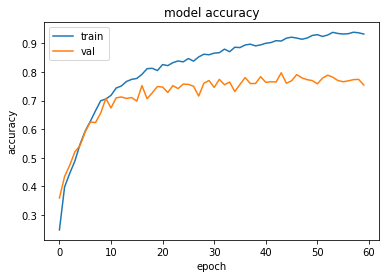

In [41]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

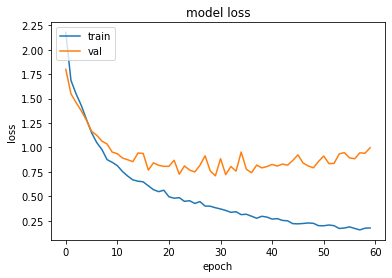

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

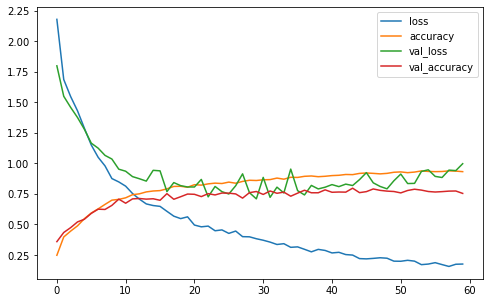

In [43]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()